<a href="https://colab.research.google.com/github/quantum-intelligence/computational-physics/blob/main/CP_Lecture6b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computational Physics
Lecture 6b
#### Metropolis Algorithm and Ising Model

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 1D Ising Model

E = $\sum_{i=1}^{N-1}$$-Js_i\cdot s_{i+1}$ - B$\mu_B \sum s_i$, B=0

Function to create spin chain

In [2]:
def create_1d_spin_chain(N=10, J=-1, cold=True):
  """
  # initialize spins
  N - number of spins
  cold - cold start True (ordered) or false (randomly ordered)
  J - strength of spin interaction
  """
  #N = 10
  #cold = False
  #J = -1
  np.random.seed()
  alpha = np.ones(N)
  if cold:
    if J < 0: #if cold AFM start, all spins must be antialighned
      for i in np.arange(N):
        if (-1)**i > 0:
          alpha[i] = -1
  else:
    # create randomly ordered spin lattice
    randex = np.random.random(N)
    #print(randex)
    for rth, r in enumerate(randex):
      if r <= 0.5:
        alpha[rth] = -1
      else:
        alpha[rth] = 1
  return alpha




In [3]:
def gen_alpha_tr(alpha):
  """
  # create a trial configuration
  # randomly flip a spin in the existing configuration
  """
  N=len(alpha)
  randex = np.random.randint(N)
  alpha_tr = alpha.copy()
  alpha_tr[randex] = alpha_tr[randex]*-1
  #print(randex)
  return alpha_tr



In [7]:
def calc_E(N, alpha, J):
  """
  # calculate the energy
  """
  #J = -1
  E = 0
  for i in np.arange(N-1):
    E_i = -1*J*alpha[i]*alpha[i+1]
    #print(alpha[i], alpha[i+1], E_i)
    E = E + E_i
  return E



In [40]:
def ising_model(N=10, num_iter = 4, T = 1, J=1, cold=True):
  """
    # 1D ising model
  """
  np.random.seed()
  #num_iter = 4
  #T = 1
  alpha = create_1d_spin_chain(N, J, cold) #initialize spins
  alpha_vals = []
  E_vals = []
  for iter in np.arange(num_iter): #enter loop over iterations
    print(iter)
    alpha_tr = gen_alpha_tr(alpha) #create trial spin states
    #print(alpha_tr)
    E = calc_E(N, alpha, J)
    E_vals.append(E)
    alpha_vals.append(alpha)
    E_tr = calc_E(N, alpha_tr, J)
    if E_tr <= E:
      print("E_tr < E : ", E_tr, E)
      alpha = alpha_tr
    else:
      print("E_tr > E : ", E_tr, E)
      r = np.random.random()
      deltaE = np.abs(E_tr - E)
      P = np.exp(-1*deltaE/T)
      #print(deltaE, r, P)
      if P > r:
        #print('accept alpha_tr with Prob')
        alpha = alpha_tr
  E_final = calc_E(N, alpha_tr, J)
  return E_vals, alpha_vals



In [43]:
E_vals, alpha_vals = ising_model(N=10, num_iter = 4, T = 1, J=-1, cold=True)

0
E_tr > E :  -5.0 -9.0
1
E_tr > E :  -5.0 -9.0
2
E_tr > E :  -5.0 -9.0
3
E_tr > E :  -5.0 -9.0


In [44]:
E_vals

[-9.0, -9.0, -9.0, -9.0]

In [45]:
alpha_vals

[array([-1.,  1., -1.,  1., -1.,  1., -1.,  1., -1.,  1.]),
 array([-1.,  1., -1.,  1., -1.,  1., -1.,  1., -1.,  1.]),
 array([-1.,  1., -1.,  1., -1.,  1., -1.,  1., -1.,  1.]),
 array([-1.,  1., -1.,  1., -1.,  1., -1.,  1., -1.,  1.])]

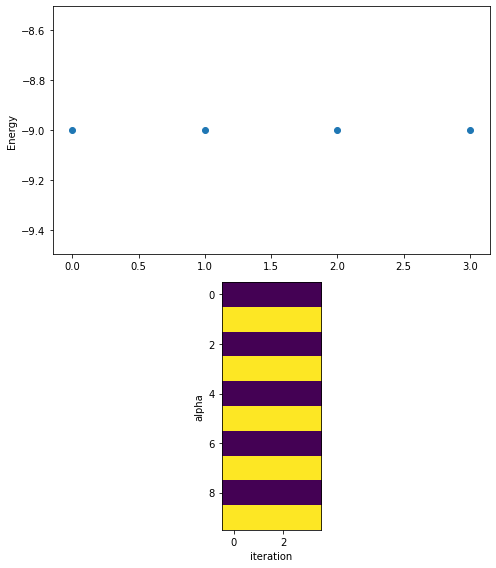

In [46]:
iter = np.arange(len(E_vals))
plt.figure(figsize=(7,8))
plt.subplot(2,1,1)
plt.scatter(iter, E_vals)
plt.ylabel("Energy")
plt.subplot(2,1,2)
plt.imshow(np.transpose(alpha_vals))
plt.ylabel("alpha")
plt.xlabel("iteration")
plt.tight_layout()
plt.show()

# Hard Spheres interacting
- Place N hard spheres in a box
- Allow them to interact with Lennard-Jones
- Use 'hard walls' boundary conditions
- Use Metropolis to assess the possibility of a phase transition (e.g. liquid to solid)
  - Use the pair distribution function